
Part 1: AND Gate Neuron
Final Weights: [0.2 0.1]
Final Bias: [-0.2]
Predictions: [0 0 0 1]

Part 2: XOR Neural Network
Final Predictions: [0.01903827 0.98357372 0.98356218 0.01700765]


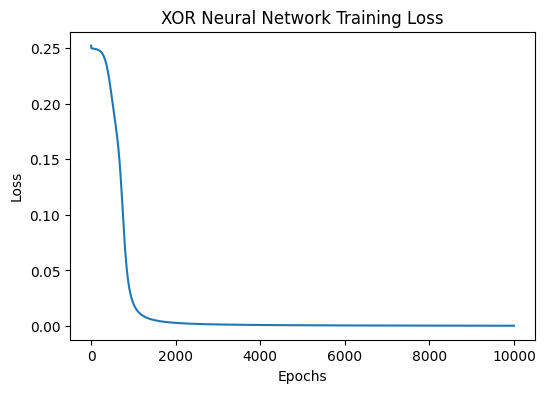

Dataset loaded successfully!
Shape of X: (120, 4)
Shape of y: (120, 3)
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Part 3: MLP on Iris Dataset
Final Training Loss: 0.010070618351384892


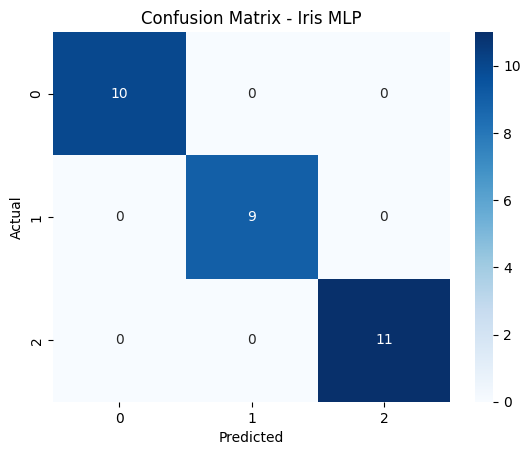

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



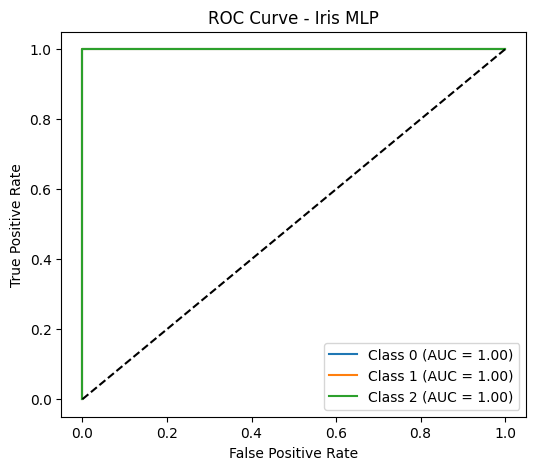

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

#############################################
# PART 1: Single Neuron Implementation (AND Gate)
#############################################

# Dataset: AND Gate Truth Table
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Parameters
lr = 0.1
weights = np.zeros((2, 1))
bias = 0

# Step Activation Function
def step(x):
    return np.where(x >= 0, 1, 0)

# Training Single Neuron
for epoch in range(10):
    for i in range(X_and.shape[0]):
        linear_output = np.dot(X_and[i], weights) + bias
        y_pred = step(linear_output)
        error = y_and[i] - y_pred
        weights += lr * error * X_and[i].reshape(2, 1)
        bias += lr * error

print("\nPart 1: AND Gate Neuron")
print("Final Weights:", weights.flatten())
print("Final Bias:", bias)
print("Predictions:", step(np.dot(X_and, weights) + bias).flatten())

#############################################
# PART 2: Feedforward Neural Network (XOR)
#############################################

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize Parameters
np.random.seed(42)
input_dim = 2
hidden_dim = 2
output_dim = 1

W1 = np.random.uniform(size=(input_dim, hidden_dim))
B1 = np.zeros((1, hidden_dim))
W2 = np.random.uniform(size=(hidden_dim, output_dim))
B2 = np.zeros((1, output_dim))

# Training Parameters
lr = 0.5
epochs = 10000
losses = []

# Training XOR Neural Network
for epoch in range(epochs):
    # Forward Pass
    Z1 = np.dot(X_xor, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)

    # Loss
    loss = np.mean((y_xor - A2) ** 2)
    losses.append(loss)

    # Backpropagation
    dA2 = A2 - y_xor
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_xor.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)

    # Weight Updates
    W2 -= lr * dW2
    B2 -= lr * dB2
    W1 -= lr * dW1
    B1 -= lr * dB1

print("\nPart 2: XOR Neural Network")
print("Final Predictions:", A2.flatten())

# Plot Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses)
plt.title("XOR Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#############################################
# PART 3: Multilayer Perceptron (MLP) on IRIS Dataset
#############################################

# Read the CSV file
data = pd.read_csv("Iris.csv")

# Drop the Id column if it exists
if "Id" in data.columns:
    data = data.drop("Id", axis=1)

# Features and labels
X = data.drop("Species", axis=1)
y = data["Species"]

# Encode target labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

print("Dataset loaded successfully!")
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)
print("Classes:", lb.classes_)

# Initialize Parameters
np.random.seed(42)
input_dim = X_train.shape[1]
hidden_dim = 8
output_dim = y_encoded.shape[1]

W1 = np.random.randn(input_dim, hidden_dim) * 0.01
B1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.01
B2 = np.zeros((1, output_dim))

# Training Parameters
lr = 0.1
epochs = 1000
train_losses = []
test_losses = []

# Training MLP on Iris
for epoch in range(epochs):
    # Forward Pass
    Z1 = np.dot(X_train, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)

    # Loss
    train_loss = np.mean((y_train - A2) ** 2)
    train_losses.append(train_loss)

    # Backpropagation
    dA2 = A2 - y_train
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)

    # Weight Updates
    W2 -= lr * dW2
    B2 -= lr * dB2
    W1 -= lr * dW1
    B1 -= lr * dB1

print("\nPart 3: MLP on Iris Dataset")
print("Final Training Loss:", train_loss)

# Prediction
Z1_test = np.dot(X_test, W1) + B1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2) + B2
A2_test = sigmoid(Z2_test)
y_pred = np.argmax(A2_test, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Iris MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(output_dim):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], A2_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 5))
for i in range(output_dim):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Iris MLP")
plt.legend()
plt.show()
